<a href="https://colab.research.google.com/github/mavela/Corpus-linguistics-scripts/blob/main/01_multilingual_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing diverse languages

After reading this section, you should:

 - know how to download and use language models in Stanza, a Python library for processing many languages
 - how to interface Stanza with the spaCy natural language processing library
 - know how to access linguistic annotations produced by Stanza language models via spaCy

## Introduction

Part II introduced basic natural language processing tasks using examples written in the English language.

As a global *lingua franca*, English is a highly-resourced language in terms of natural language processing. Compared to many other languages, the amount of data – especially human-annotated data – available for English is greater and covers a wider range of domains (Del Gratta et al. [2021](https://doi.org/10.1007/s10579-020-09520-6)).

Unfortunately, the imbalance in resources and research effort has led to a situation where the advances in processing the English language are occasionally claimed to hold for natural language in general.

However, as Bender ([2019](https://thegradient.pub/the-benderrule-on-naming-the-languages-we-study-and-why-it-matters/)) has shown, *English is not a synonym for natural language*: even if one demonstrates that computers can achieve or surpass human-level performance in some natural language processing task for the English language, this does not mean that one has solved this task or problem for *natural language as a whole*.

To measure progress in the field of natural language processing and to ensure that as many languages as possible can benefit from advances in language technology, it is highly desirable to conduct research on processing languages used across the world.

## Stanza – a Python library for processing many languages

In [ ]:
# Run this cell to view a YouTube video related to this topic
#from IPython.display import YouTubeVideo
#YouTubeVideo('41aN-_NNY8g', height=350, width=600)

To get started with working languages other than English, we can use a library named Stanza.

[Stanza](https://stanfordnlp.github.io/stanza/) is a Python library for natural language processing that provides pre-trained language models for [many languages](https://stanfordnlp.github.io/stanza/available_models.html) (Qi et al. [2020](https://www.aclweb.org/anthology/2020.acl-demos.14/)).

Stanza language models are trained on corpora annotated using the [Universal Dependencies](https://universaldependencies.org/) formalism, which means that these models can perform tasks such as tokenization, part-of-speech tagging, morphological tagging and dependency parsing.

These are essentially the same tasks that we explored using the spaCy natural language processing library in [Part II](../part_ii/03_basic_nlp.ipynb).

Let's start exploring Stanza by importing the library.

In [ ]:
!pip install torch==2.0.1 stanza==1.4.2 spacy==3.7.2 spacy-stanza==1.0.2

In [ ]:
#! pip install spacy-stanza

In [ ]:
# Import the Stanza library
import stanza

To process a given language, we must first download a Stanza language model using the `download()` function.

The `download()` function requires a single argument, `lang`, which defines the language model to be downloaded.

To download a language model for a given language, retrieve the two-letter language code (e.g. `wo`) for the language from [the list of available language models](https://stanfordnlp.github.io/stanza/available_models.html) and pass the language code as a string object to the `lang` argument.

For example, the following code would download a model for Wolof, a language spoken in West Africa that belongs to the family of Niger-Congo languages. This model has been trained using the Wolof treebank (Dione [2019](https://www.aclweb.org/anthology/W19-8003/)).

```python
# Download Stanza language model for Wolof
stanza.download(lang='wo')
```

For some languages, Stanza provides models that have been trained on different datasets. Stanza refers to models trained on different datasets as *packages*. By default, Stanza automatically downloads the package with model trained on the largest dataset available for the language in question.

To select a model trained on a specific dataset, pass the name of its package as a string object to the `package` argument.

To exemplify, the following command would download a model for Finnish trained on the [*FinnTreeBank*](https://universaldependencies.org/treebanks/fi_ftb/index.html) (package: `ftb`) dataset instead of the default model, which is trained on the [*Turku Dependency Treebank*](https://universaldependencies.org/treebanks/fi_tdt/index.html) dataset (package: `tbt`).

```python
# Download a Stanza language model for Finnish trained using the FinnTreeBank (package 'ftb')
stanza.download(lang='fi', package='ftb')
```

The package names are provided in [the list of language models](https://stanfordnlp.github.io/stanza/available_models.html) available for Stanza.

In [ ]:
stanza.download(lang='wo')

INFO:stanza:Downloading default packages for language: wo (Wolof) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


To install the language model into the permanent storage on [CSC Notebooks](https://notebooks.csc.fi/), we must also pass the optional `model_dir` argument to the `download()` function, which contains a string that points towards a directory in the permanent storage, namely `/home/jovyan/work`.

If the models are not placed in the permanent storage, they will be deleted when the server is shut down.

Run the cell below to download the Stanza language model for Wolof into the directory `../stanza_models`.

Note that `..` moves up one step in the directory structure relative to this notebook, which places the model into the directory `stanza_models` under the directory `notebooks`.

In [ ]:
# Download a Stanza language model for Wolof into the directory "../stanza_models"
stanza.download(lang='wo')#, model_dir='../stanza_models')

INFO:stanza:Downloading default packages for language: wo (Wolof) ...
INFO:stanza:File exists: /root/stanza_resources/wo/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


### Quick exercise

Check [the list of language models](https://stanfordnlp.github.io/stanza/available_models.html) available for Stanza and download a model for a language that you would like to work with.

Use the code below: remember to replace the input to the `lang` argument with the code corresponding to your language of interest.

```python
stanza.download(lang='XX', model_dir='../stanza_models')
```

### Loading a language model into Stanza

To load a Stanza language model into Python, we must first create a *Pipeline* object by initialising an instance of the `Pipeline()` class from the `stanza` module.

To exemplify this procedure, let's initialise a pipeline with a language model for Wolof.

To load a language model for Wolof into the pipeline, we must provide the string `wo` to the `lang` argument of the `Pipeline()` function.

```python
# Initialise a Stanza pipeline with a language model for Wolof;
# assign model to variable 'nlp_wo'.
nlp_wo = stanza.Pipeline(lang='wo')
```

In [ ]:
nlp_wo = stanza.Pipeline(lang='wo', processors='tokenize,lemma,pos,depparse', verbose=False, use_gpu=False)

Because we did **not** place the language model into the default directory, we must also provide a string containing the path to the directory with Stanza language models to the `dir` argument.

We then store the resulting pipeline under the variable `nlp_wo`.

In [ ]:
# Use the Pipeline() class to initialise a Stanza pipeline with a language model for Wolof, which
# is assigned to the variable 'nlp_wo'.
# we do this above nlp_wo = stanza.Pipeline(lang='wo',use_gpu=False)#, dir='../stanza_models')


In [ ]:
# Call the variable to examine the output
nlp_wo

Loading a language model into Stanza returns *Pipeline* object, which consists of a number of *processors* that perform various natural language processing tasks.

The output above lists the processors under the heading of the same name, together with the names of the packages used to train these processors.

As we learned in [Part II](http://localhost:8888/notebooks/part_ii/04_basic_nlp_continued.ipynb#Modifying-spaCy-pipelines), one might not always need all linguistic annotations created by a model, which always come with a computational cost.

To speed up processing, you can define the processors to be included in the *Pipeline* object by providing the argument `processors` with a string object that contains the [processor names](https://stanfordnlp.github.io/stanza/pipeline.html#processors) to be included in the pipeline, which must be separated by commas.

For example, creating a *Pipeline* using the command below would only include the processors for tokenization and part-of-speech tagging into the pipeline.

```python
# Initialise a Stanza pipeline with a language model for Wolof;
# assign model to variable 'nlp_wo'. Only include tokenizer
# and part-of-speech tagger.
nlp_wo = stanza.Pipeline(lang='wo', processors='tokenize, pos')
```

### Processing text using Stanza

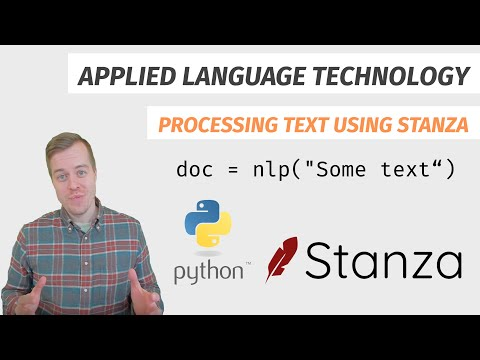

In [ ]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('w8vvgP4dQTU', height=350, width=600)

Now that we have initialised a Stanza *Pipeline* with a language model, we can feed some text in Wolof to the model under `nlp_wo` as a string object.

We store the result under the variable `doc_wo`.

In [ ]:
# Feed text to the model under 'nlp_wo'; store result under the variable 'doc'
doc_wo = nlp_wo("Réew maa ngi lebe turam wi ci dex gi ko peek ci penku ak bëj-gànnaar, te ab balluwaayam bawoo ca Fuuta Jallon ca Ginne, di Dexug Senegaal. Ab kilimaam bu gëwéel la te di bu fendi te yor ñaari jamono: jamonoy nawet (jamonoy taw) ak ju noor (jamonoy fendi).")

# Check the type of the output
type(doc_wo)

stanza.models.common.doc.Document

This returns a Stanza [*Document*](https://stanfordnlp.github.io/stanza/data_objects.html#document) object, which contains the linguistic annotations created by passing the text through the pipeline.

The attribute `sentences` of a Stanza *Document* object contains a list, where each item contains a single sentence.

Thus we can use brackets to access the first item `[0]` in the list.

In [ ]:
# Get the first item in the list of sentences
doc_wo.sentences[0]

[
  {
    "id": 1,
    "text": "Réew",
    "lemma": "réew",
    "upos": "NOUN",
    "xpos": "NOUN",
    "head": 4,
    "deprel": "nsubj",
    "start_char": 0,
    "end_char": 4
  },
  {
    "id": 2,
    "text": "maa",
    "lemma": "a",
    "upos": "AUX",
    "xpos": "AUX",
    "feats": "PronType=Prs",
    "head": 4,
    "deprel": "aux",
    "start_char": 5,
    "end_char": 8
  },
  {
    "id": 3,
    "text": "ngi",
    "lemma": "ngi",
    "upos": "AUX",
    "xpos": "AUX",
    "feats": "Aspect=Prog",
    "head": 4,
    "deprel": "aux",
    "start_char": 9,
    "end_char": 12
  },
  {
    "id": 4,
    "text": "lebe",
    "lemma": "lebe",
    "upos": "VERB",
    "xpos": "VERB",
    "feats": "Mood=Ind|VerbForm=Fin",
    "head": 0,
    "deprel": "root",
    "start_char": 13,
    "end_char": 17
  },
  {
    "id": 5,
    "text": "turam",
    "lemma": "tur",
    "upos": "NOUN",
    "xpos": "NOUN",
    "feats": "Number=Sing|Poss=Yes",
    "head": 4,
    "deprel": "obj",
    "start_char": 18,
  

Although the output contains both brackets `[]` and curly braces `{}`, which Python typically uses for marking lists and dictionaries, respectively, the output is not a list with nested dictionaries, but a Stanza [*Sentence*](https://stanfordnlp.github.io/stanza/data_objects.html#sentence) object.

In [ ]:
# Check the type of the first item in the Document object
type(doc_wo.sentences[0])

stanza.models.common.doc.Sentence

The *Sentence* object contains [various attributes and methods](https://stanfordnlp.github.io/stanza/data_objects.html#sentence) for accessing the linguistic annotations created by the language model.

If we wish to interact with the annotations using data structures native to Python, we can use the `to_dict()` method to cast the annotations into a list of dictionaries, in which each dictionary stands for a single Stanza [*Token*](https://stanfordnlp.github.io/stanza/data_objects.html#token) object.

The *key* and *value* pairs in these dictionaries contain the linguistic annotations for each *Token*.

In [ ]:
# Cast the first Sentence object into a Python dictionary; store under variable 'doc_dict'
doc_dict = doc_wo.sentences[0].to_dict()

# Get the dictionary for the first Token
doc_dict[0]

{'id': 1,
 'text': 'Réew',
 'lemma': 'réew',
 'upos': 'NOUN',
 'xpos': 'NOUN',
 'head': 4,
 'deprel': 'nsubj',
 'start_char': 0,
 'end_char': 4}

As you can see, the dictionary consists of key and value pairs, which hold the linguistic annotations.

We can retrieve a list of keys available for a Python dictionary using the `keys()` method.

In [ ]:
# Get a list of keys for the first Token in the dictionary 'doc_dict'
doc_dict[0].keys()

dict_keys(['id', 'text', 'lemma', 'upos', 'xpos', 'head', 'deprel', 'start_char', 'end_char'])

Now that we have listed the keys, let's retrieve the value under the key `lemma`.

In [ ]:
# Get the value under key 'lemma' for the first item [0] in the dictionary 'doc_dict'
doc_dict[0]['lemma']

'réew'

This returns the lemma of the word "réew", which stands for "country".

### Processing multiple texts using Stanza

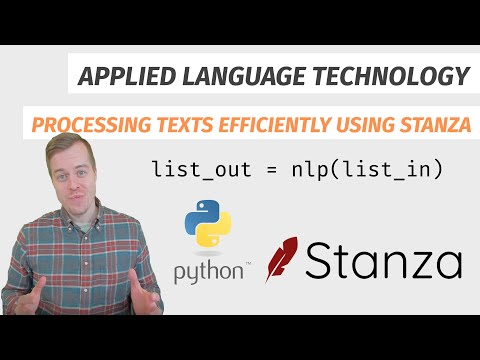

In [ ]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('L2MmfJ3x5Jk', height=350, width=600)

To process multiple documents with Stanza, the most efficent way is to first collect the documents as string objects into a Python list.

Let's define a toy example with a couple of example documents in Wolof and store them as string objects into a list under the variable `str_docs`.

In [ ]:
# Define a Python list consisting of two strings
str_docs = ['Lislaam a ngi njëkk a tàbbi ci Senegaal ci diggante VIIIeelu xarnu ak IXeelu xarnu, ña ko fa dugal di ay yaxantukat yu araab-yu-berber.',
            'Li ëpp ci gëstu yi ñu def ci wàllug Gëstu-askan (walla demogaraafi) ci Senegaal dafa sukkandiku ci Waññ (recensement) yi ñu jotoon a def ci 1976, 1988 rawati na 2002.']

Next, we create a list of Stanza *Document* objects using a Python list comprehension. These *Document* objects are annotated for their linguistic features when they are passed through a *Pipeline* object.

At this stage, we simply cast each string in the list `str_docs` to a Stanza *Document* object. We store the result into a list named `docs_wo_in`.

Before proceeding to create the *Document* objects, let's examine how the list comprehension is structured by taking apart its syntax step by step.

The list comprehension is like a `for` loop, which was introduced in [Part II](../part_ii/01_basic_text_processing.html#manipulating-text), which uses the contents of an existing list to create a new list.

To begin with, just like lists, list comprehensions are marked using surrounding brackets `[]`.

```python
docs_wo_in = []
```

Next, on the right-hand side of the `for` statement, we use the variable `doc` to refer to items in the list `str_docs` that we are looping over.

```python
docs_wo_in = [... for doc in str_docs]
```

Now that we can refer to list items using the variable `doc`, we can define what we do to each item on the left-hand side of the `for` statement.

```python
docs_wo_in = [stanza.Document([], text=doc) for doc in str_docs]
```

For each item in the list `str_docs`, we initialise an empty `Document` object and pass two inputs to this object:

 1. an empty list `[]` that will be populated with linguistic annotations,
 2. the contents of the string variable under `doc` to the argument `text`.

In [ ]:
# Use a list comprehension to create a Python list with Stanza Document objects.
docs_wo_in = [stanza.Document([], text=doc) for doc in str_docs]

# Call the variable to check the output
docs_wo_in

[[], []]

Don't let the output fool you here: what looks like two empty Python lists nested within a list are actually Stanza *Document* objects.

Let's use the brackets to access and examine the first *Document* object in the list `docs_wo_in`.

In [ ]:
# Check the type of the first item in the list 'docs_wo_in'
type(docs_wo_in[0])

stanza.models.common.doc.Document

As you can see, the object is indeed a Stanza *Document* object.

We can verify that our input texts made it into this document by examining the `text` attribute.

In [ ]:
# Check the contents of the 'text' attribute under the
# first Sentence in the list 'docs_wo_in'
docs_wo_in[0].text

'Lislaam a ngi njëkk a tàbbi ci Senegaal ci diggante VIIIeelu xarnu ak IXeelu xarnu, ña ko fa dugal di ay yaxantukat yu araab-yu-berber.'

Now that we have a list of Stanza *Document* objects, we can pass them all at once to the language model for annotation.

This can be achieved by simply providing the list as input to the Wolof language model stored under `nlp_wo`.

We then store the annotated Stanza *Document* objects under the variable `docs_wo_out`.

In [ ]:
# Pass the list of Document objects to the language model 'nlp_wo'
# for annotation.
docs_wo_out = nlp_wo(docs_wo_in)

# Call the variable to check the output
docs_wo_out

[[
   [
     {
       "id": 1,
       "text": "Lislaam",
       "lemma": "Lislaam",
       "upos": "PROPN",
       "xpos": "NAME",
       "head": 4,
       "deprel": "nsubj",
       "start_char": 0,
       "end_char": 7
     },
     {
       "id": 2,
       "text": "a",
       "lemma": "a",
       "upos": "AUX",
       "xpos": "AUX",
       "feats": "PronType=Prs",
       "head": 4,
       "deprel": "aux",
       "start_char": 8,
       "end_char": 9
     },
     {
       "id": 3,
       "text": "ngi",
       "lemma": "ngi",
       "upos": "AUX",
       "xpos": "AUX",
       "feats": "Aspect=Prog",
       "head": 4,
       "deprel": "aux",
       "start_char": 10,
       "end_char": 13
     },
     {
       "id": 4,
       "text": "njëkk",
       "lemma": "njëkk",
       "upos": "VERB",
       "xpos": "VERB",
       "feats": "Mood=Ind|VerbForm=Fin",
       "head": 0,
       "deprel": "root",
       "start_char": 14,
       "end_char": 19
     },
     {
       "id": 5,
       "text": "a

As you can see, passing the *Document* objects to the language model populates them with linguistic annotations, which can be then explored as introduced [above](#Processing-text-using-Stanza).

## Interfacing Stanza with spaCy

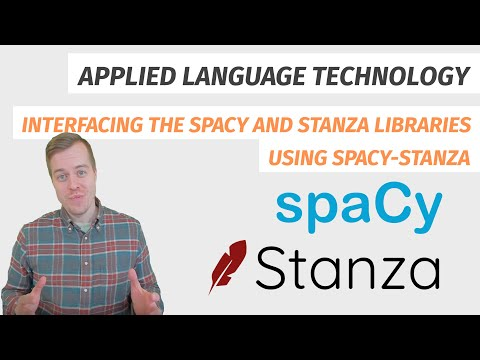

In [ ]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('Yqy7I7c7EXc', height=350, width=600)

In [ ]:
#!pip install torch==2.0.1 stanza==1.4.2 spacy==3.7.2 spacy-stanza==1.0.2

If you are more familiar with the spaCy library for natural language processing, whose use was covered extensively in [Part II](../part_ii/03_basic_nlp.ipynb), then you will be happy to know that you can also use some of the Stanza language models in spaCy!

This can be achieved using a Python library named [spacy-stanza](https://spacy.io/universe/project/spacy-stanza), which interfaces the two libraries.

Given that Stanza currently has more pre-trained language models available than spaCy, the spacy-stanza library considerably increases the number of language models available for spaCy.

There is, however, **one major limitation**: the language in question must be supported by both [Stanza](https://stanfordnlp.github.io/stanza/available_models.html) and [spaCy](https://spacy.io/usage/models#languages).

For example, we cannot use the Stanza language model for Wolof in spaCy, because spaCy does not support the Wolof language.

To start using Stanza language models in spaCy, let's start by importing the spacy-stanza library (module name: `spacy_stanza`).

In [ ]:
# Import the spaCy and spacy-stanza libraries
import spacy
import spacy_stanza

In [ ]:
import stanza

This imports both spaCy and spacy-stanza libraries into Python. To continue, we must ensure that we have the Stanza language model for Finnish available as well.

As shown above, this model can be downloaded using the following command:

```python
# Download a Stanza language model for Finnish
stanza.download(lang='fi')
```

Just as with the language model for Wolof above, we download the Stanza language model into the permanent storage on the CSC server.

To do so, provide a string object that points towards the directory `../stanza_models` to the argument `model_dir` of the `download()` function.

In [ ]:
# Download a Stanza language model for Finnish into the directory '../stanza_models'
stanza.download(lang='fi')

Because spaCy supports [the Finnish language](https://spacy.io/usage/models#languages), we can load Stanza language models for Finnish into spaCy using the spacy-stanza library.

This can be achieved using the `load_pipeline()` function available under the `spacy_stanza` module.

To load Stanza language model for a given language, you must provide the two-letter code for the language in question (e.g. `fi`) to the argument `name`:

```python
# Load a Stanza language model for Finnish into spaCy
nlp_fi = spacy_stanza.load_pipeline(name='fi')
```

Because we did not download the Stanza language models into the default directory, we must also provide the optional argument `dir` to the `load_pipeline()` function.

The `dir` argument takes a string object as its input, which must point to the directory that contains Stanza language models.

In [ ]:
# Use the load_pipeline function to load a Stanza model into spaCy.
# Assign the result under the variable 'nlp'.
nlp_fi = spacy_stanza.load_pipeline(name='fi')#, dir='../stanza_models')

If we examine the resulting object under the variable `nlp_fi` using Python's `type()` function, we will see that the object is indeed a spaCy *Language* object.

In [ ]:
# Check the type of the object under 'nlp_fi'
type(nlp_fi)

spacy.lang.fi.Finnish

Generally, this object behaves just like any other spaCy *Language* object that we learned to use in [Part II](../part_ii/03_basic_nlp.ipynb#Performing-basic-NLP-tasks-using-spaCy).

We can explore its use by processing a few sentences from a recent [news article](https://yle.fi/aihe/artikkeli/2021/03/08/yleiso-aanesti-tarja-halonen-on-inspiroivin-nainen-karkikolmikkoon-ylsivat-myos) in written Finnish.

We feed the text as a string object to the *Language* object under `nlp_fi` and store the result under the variable `doc_fi`.

In [ ]:
# Feed the text to the language model under 'nlp_fi', store result under 'doc_fi'
doc_fi = nlp_fi('Tove Jansson keräsi 148 ääntä eli 18,2% annetuista äänistä. Kirjailija, kuvataiteilija ja pilapiirtäjä tuli kansainvälisesti tunnetuksi satukirjoistaan ja sarjakuvistaan.')

Let's continue by retrieving sentences from the *Doc* object, which are available under the attribute `sents`, as we learned in [Part II](../part_ii/03_basic_nlp.ipynb#Sentence-segmentation).

The object available under the `sents` attribute is a Python generator that yields *Doc* objects.

To examine them, we must catch the objects into a suitable data structure. In this case, the data structure that best fits our needs is a Python list.

Hence we cast the output from the generator object under `sents` into a list using the `list()` function.

In [ ]:
# Get sentences contained in the Doc object 'doc_fi'.
# Cast the result into list.
sents_fi = list(doc_fi.sents)

# Call the variable to check the output
sents_fi

[Tove Jansson keräsi 148 ääntä eli 18,2% annetuista äänistä.,
 Kirjailija, kuvataiteilija ja pilapiirtäjä tuli kansainvälisesti tunnetuksi satukirjoistaan ja sarjakuvistaan.]

We can also use spaCy's `displacy` submodule to visualise the syntactic dependencies.

To do so for the first sentence under `sents_fi`, we must first access the first item in the list using brackets `[0]` as usual.

Let's start by checking the type of this object.

In [ ]:
# Check the type of the first item in the list 'sents_fi'
type(sents_fi[0])

spacy.tokens.span.Span

As you can see, the result is a spaCy *Span* object, which is a sequence of *Token* objects contained within a *Doc* object.

We can then call the `render` function from the `displacy` submodule to visualise the syntactic dependencies for the *Span* object under `sents_fi[0]`.

In [ ]:
# Import the displacy submodule
from spacy import displacy

# Use the render function to render the first item [0] in the list 'sents_fi'.
# Pass the argument 'style' with the value 'dep' to visualise syntactic dependencies.
displacy.render(sents_fi[0], style='dep')

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="fi" id="7d6997d737ab40a1ac099a611b3754e8-0" class="displacy" width="1625" height="312.0" direction="ltr" style="max-width: none; height: 312.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">Tove</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PROPN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="225">Jansson</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">PROPN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="400">keräsi</tspan>\n    <tspan class="dis

Note that spaCy will raise a warning about storing custom attributes when writing the *Doc* object to disk for visualisation.

We can also examine the linguistic annotations created for individual *Token* objects within this *Span* object.

In [ ]:
# Loop over each Token object in the Span
for token in sents_fi[0]:

    # Print the token, its lemma, dependency and morphological features
    print(token, token.lemma_, token.dep_, token.morph)

Tove Tove nsubj Case=Nom|Number=Sing
Jansson Jansson flat:name Case=Nom|Number=Sing
keräsi kerätä root Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act
148 148 nummod NumType=Card
ääntä ääni obj Case=Par|Number=Sing
eli eli cc 
18,2 18,2 nummod NumType=Card
% % conj 
annetuista antaa acl Case=Ela|Number=Plur|PartForm=Past|VerbForm=Part|Voice=Pass
äänistä ääni nmod Case=Ela|Number=Plur
. . punct 


The examples above show how we can access the linguistic annotations created by a Stanza language model through spaCy *Doc*, *Span* and *Token* objects.

This section should have given you an idea of how to begin processing diverse languages.

In the [following section](02_universal_dependencies.ipynb), we will dive deeper into the Universal Dependencies framework.